In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jessemostipak_hotel_booking_demand_path = kagglehub.dataset_download('jessemostipak/hotel-booking-demand')

print('Data source import complete.')


Data source import complete.


In [ ]:
jessemostipak_hotel_booking_demand_path

'/root/.cache/kagglehub/datasets/jessemostipak/hotel-booking-demand/versions/1'

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv(jessemostipak_hotel_booking_demand_path+"/hotel_bookings.csv")


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
# Frequency of exact row duplicates
row_duplicates = df.value_counts()
duplicates_filtered = row_duplicates[row_duplicates > 1]

# Step 3: Convert the multi-index Series to a DataFrame
structured_df = duplicates_filtered.reset_index()
structured_df.columns = list(df.columns) + ['count']  # Add 'count' as the last column

# Step 4: Display the structured output
print("Structured Duplicate Rows:")
structured_df

Structured Duplicate Rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,count
0,City Hotel,0,256,2016,October,43,16,2,3,2,...,9.0,333.0,0,Transient-Party,100.75,0,0,Check-Out,2016-10-21,7
1,Resort Hotel,0,24,2015,November,45,3,3,10,1,...,334.0,281.0,0,Transient-Party,40.00,0,0,Check-Out,2015-11-16,5
2,Resort Hotel,0,36,2015,November,45,7,2,6,1,...,185.0,281.0,0,Transient-Party,36.00,0,0,Check-Out,2015-11-15,4
3,Resort Hotel,0,36,2015,November,45,7,2,6,1,...,185.0,281.0,0,Transient-Party,36.00,0,0,Check-Out,2015-11-15,3
4,City Hotel,0,256,2016,October,43,16,2,3,2,...,9.0,333.0,0,Transient-Party,100.75,0,0,Check-Out,2016-10-21,2
5,Resort Hotel,0,31,2015,November,45,2,5,10,1,...,185.0,281.0,0,Transient-Party,52.20,0,0,Check-Out,2015-11-17,2
6,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,185.0,281.0,0,Transient-Party,52.20,0,0,Check-Out,2015-11-17,2
7,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,326.0,281.0,0,Transient,48.00,0,0,Check-Out,2015-11-16,2
8,Resort Hotel,0,31,2015,November,45,2,3,10,1,...,185.0,281.0,0,Transient-Party,36.00,0,0,Check-Out,2015-11-15,2
9,Resort Hotel,0,27,2015,November,45,6,2,7,1,...,334.0,281.0,0,Transient-Party,40.00,0,0,Check-Out,2015-11-15,2


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.duplicated().value_counts(normalize =True)

,proportion
False,0.732021
True,0.267979


In [ ]:
# Get all duplicate rows (including the first occurrence)
duplicates = df[df.duplicated(keep=False)]
duplicates

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# Fill missing values in agent and company with 0
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# Fill missing country values with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# Fill missing children values with mode (0.0)
children_mode = df['children'].mode()[0]
df['children'].fillna(children_mode, inplace=True)

# Drop rows where agent and company are 0, but distribution_channel is not 'Direct'
df = df[~((df['agent'] == 0) & (df['company'] == 0) & (df['distribution_channel'] != 'Direct'))]

missing_data = df.isna().sum()
print(missing_data)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# Convert 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Verify data types
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

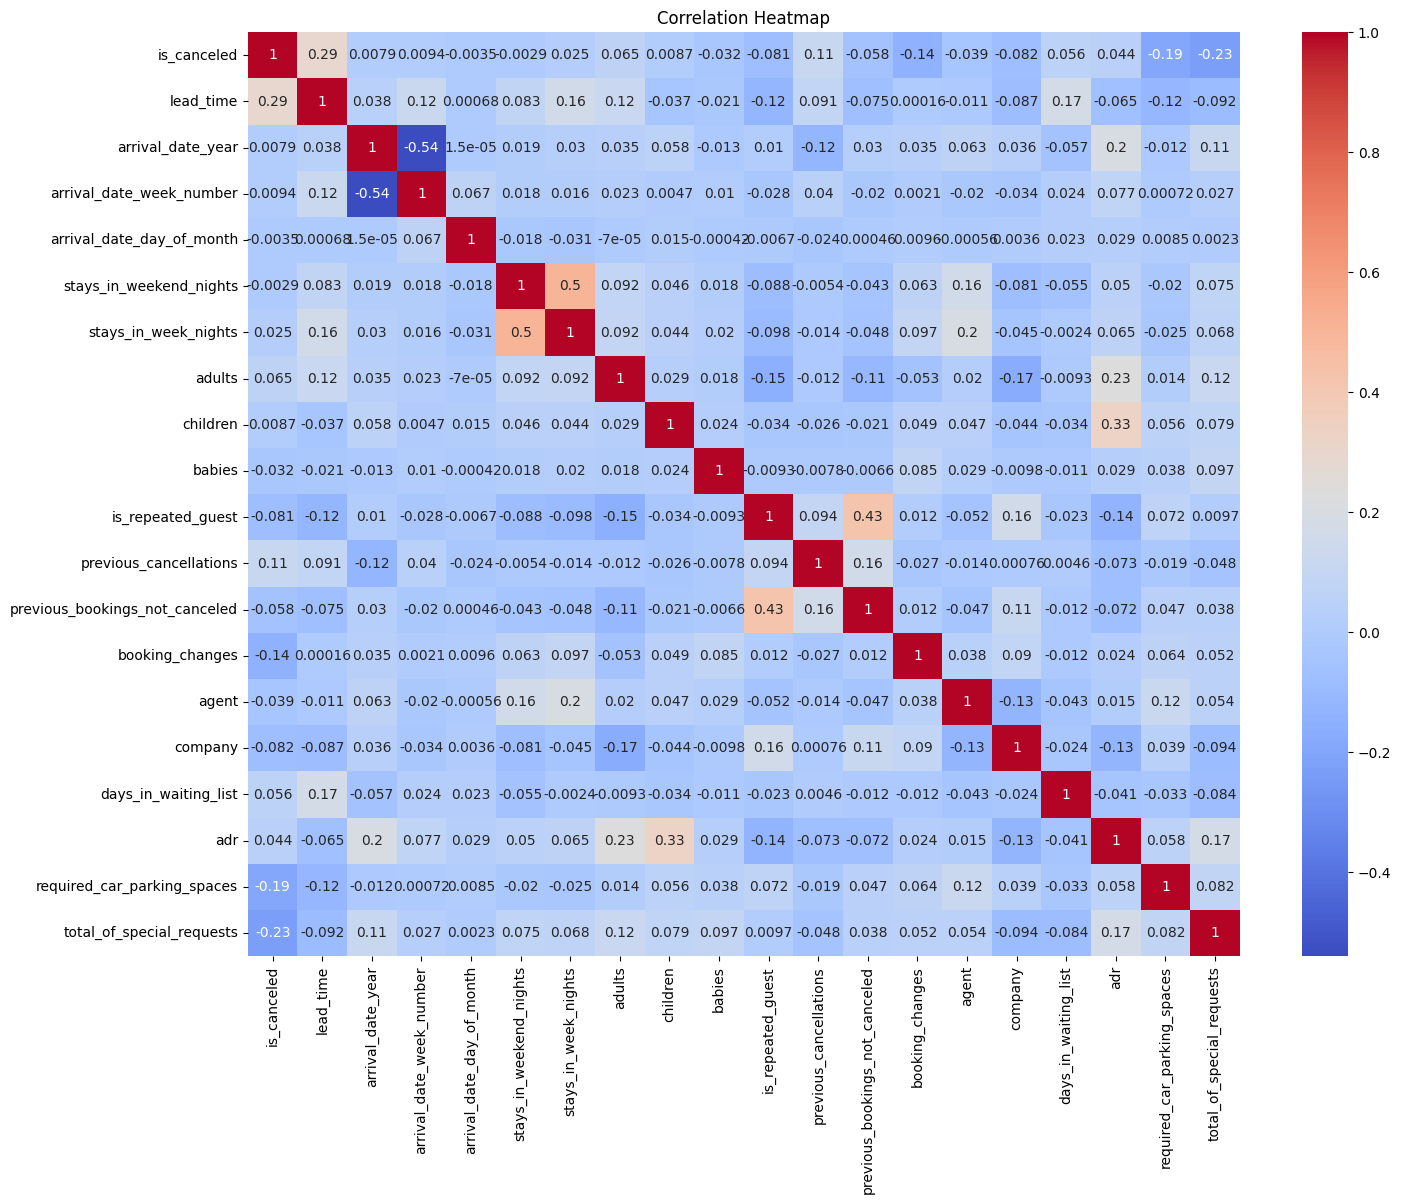

In [ ]:
# Correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

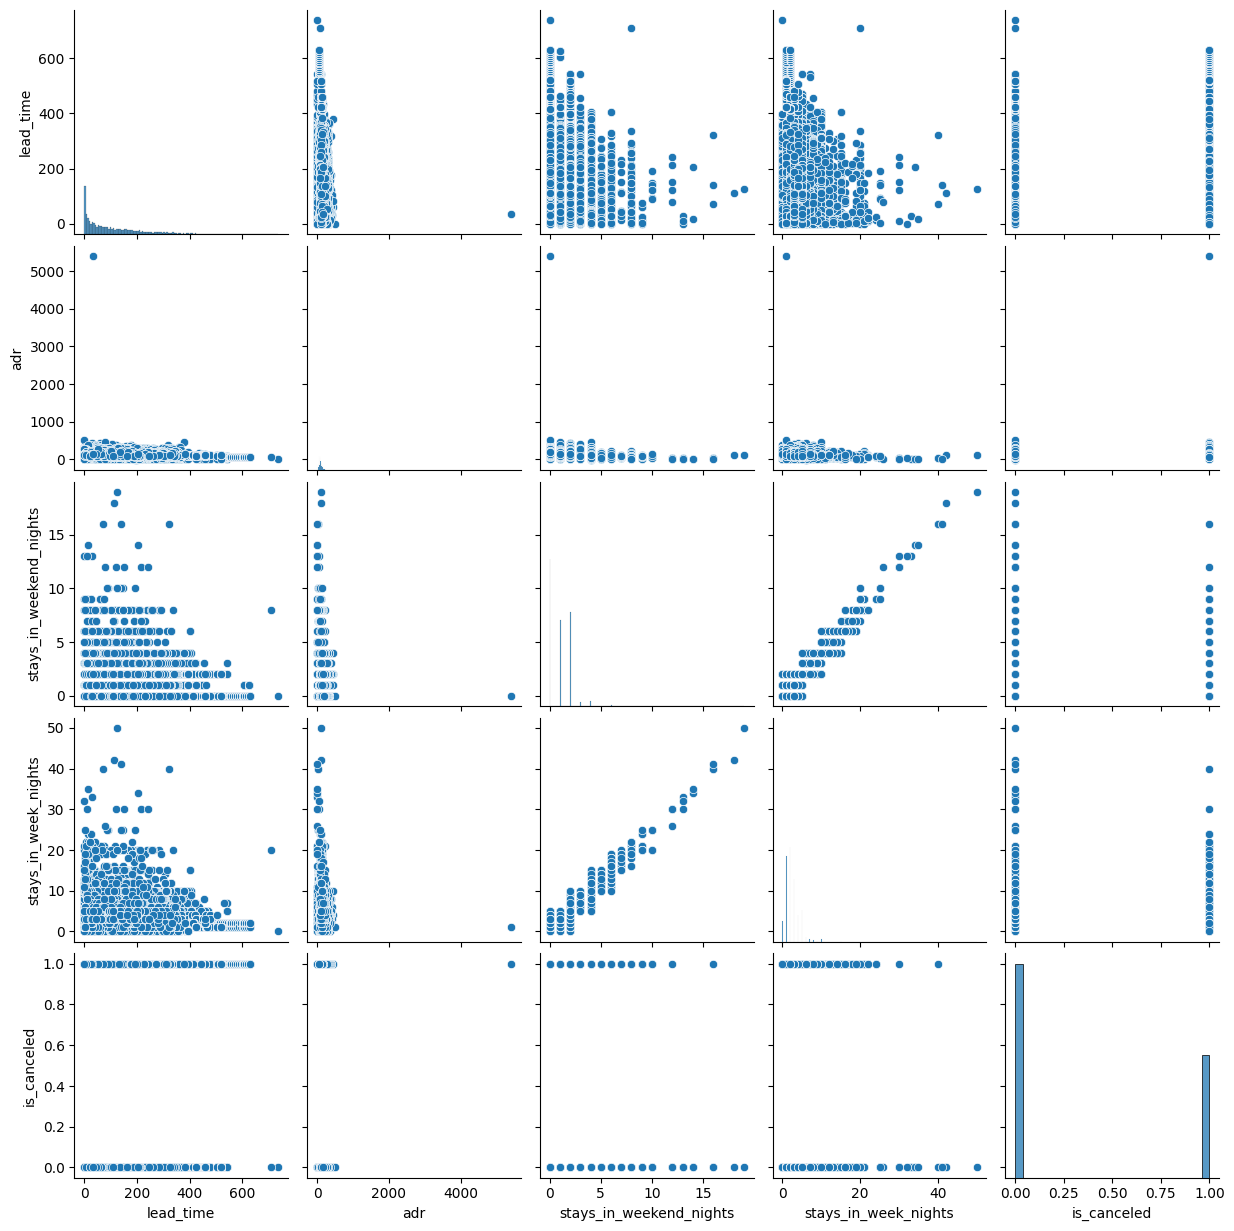

In [ ]:
# Pair plot for selected features
sns.pairplot(df[['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'is_canceled']])
plt.show()

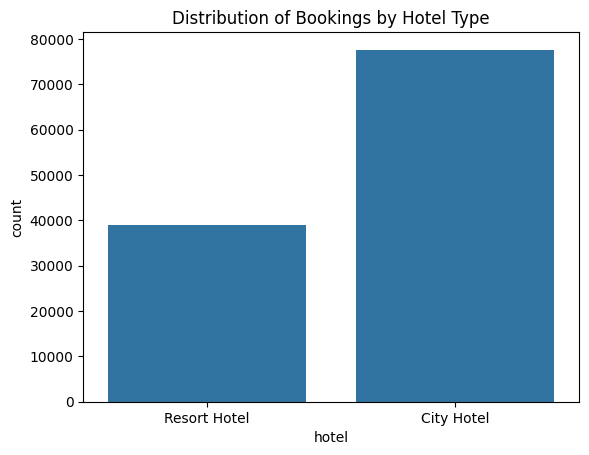

In [ ]:
# Distribution of bookings by hotel type
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Bookings by Hotel Type')
plt.show()

In [ ]:
# Create a new feature for total nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Create a new feature for total guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Display the first few rows with new features
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


In [ ]:
# Remove records where adults, children, and babies are all 0
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

In [ ]:
# Remove records with first-time guests who have previous booking history
df = df[~((df['is_repeated_guest'] == 0) & ((df['previous_cancellations'] > 0) | (df['previous_bookings_not_canceled'] > 0)))]

In [ ]:
# Remove records where the number of adults is 0 but a parking space is requested
df = df[~((df['adults'] == 0) & (df['required_car_parking_spaces'] > 0))]

In [ ]:
# Convert the 'children' variable from float to int
df['children'] = df['children'].astype(int)
print(df['children'].dtypes)

int64


In [ ]:
# Map month names to numeric values
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)
df['arrival_date_month']

,arrival_date_month
0,7
1,7
2,7
3,7
4,7
...,...
119385,8
119386,8
119387,8
119388,8


In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2.0
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3.0
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2.0
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2.0


In [ ]:
# Convert 'agent' and 'company' columns from float to int to str for better visualization
df['agent'] = df['agent'].astype(int).astype(str)
df['company'] = df['company'].astype(int).astype(str)

print(df[['agent', 'company']].dtypes)

agent      object
company    object
dtype: object


In [ ]:
df.dtypes


,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,int64
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [ ]:
# Extract categorical/string variables
cat_cols = df.select_dtypes(include=['object']).columns
# Extract numerical variables
num_cols = df.select_dtypes(include=['number']).columns

In [ ]:
df[cat_cols]


,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,0,0,Transient,Check-Out
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,0,0,Transient,Check-Out
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,0,0,Transient,Check-Out
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,304,0,Transient,Check-Out
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,240,0,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,394,0,Transient,Check-Out
119386,City Hotel,BB,FRA,Online TA,TA/TO,E,E,No Deposit,9,0,Transient,Check-Out
119387,City Hotel,BB,DEU,Online TA,TA/TO,D,D,No Deposit,9,0,Transient,Check-Out
119388,City Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,89,0,Transient,Check-Out


In [ ]:
df[num_cols]


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights,total_guests
0,0,342,2015,7,27,1,0,0,2,0,...,0,0,0,3,0,0.00,0,0,0,2.0
1,0,737,2015,7,27,1,0,0,2,0,...,0,0,0,4,0,0.00,0,0,0,2.0
2,0,7,2015,7,27,1,0,1,1,0,...,0,0,0,0,0,75.00,0,0,1,1.0
3,0,13,2015,7,27,1,0,1,1,0,...,0,0,0,0,0,75.00,0,0,1,1.0
4,0,14,2015,7,27,1,0,2,2,0,...,0,0,0,0,0,98.00,0,1,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0,...,0,0,0,0,0,96.14,0,0,7,2.0
119386,0,102,2017,8,35,31,2,5,3,0,...,0,0,0,0,0,225.43,0,2,7,3.0
119387,0,34,2017,8,35,31,2,5,2,0,...,0,0,0,0,0,157.71,0,4,7,2.0
119388,0,109,2017,8,35,31,2,5,2,0,...,0,0,0,0,0,104.40,0,0,7,2.0


In [ ]:
numeric_summary = df[num_cols].describe()
numeric_summary

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights,total_guests
count,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,...,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000
mean,0.336494,98.537021,2016.194673,6.498752,26.929797,15.825119,0.938582,2.531494,1.867308,0.111030,...,0.032787,0.015327,0.122211,0.227052,2.251173,103.496237,0.064613,0.601497,3.470076,1.986814
std,0.472512,103.176477,0.690293,3.075055,13.557608,8.801028,0.999711,1.913870,0.583187,0.411226,...,0.178080,0.261323,1.472594,0.648842,18.032060,51.078634,0.247058,0.802092,2.564857,0.732020
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,17.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,71.395000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,65.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,95.400000,0.000000,0.000000,3.000000,2.000000
75%,1.000000,151.000000,2017.000000,9.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,127.670000,0.000000,1.000000,4.000000,2.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,18.000000,42.000000,55.000000,10.000000,...,1.000000,21.000000,72.000000,18.000000,391.000000,5400.000000,3.000000,5.000000,60.000000,55.000000


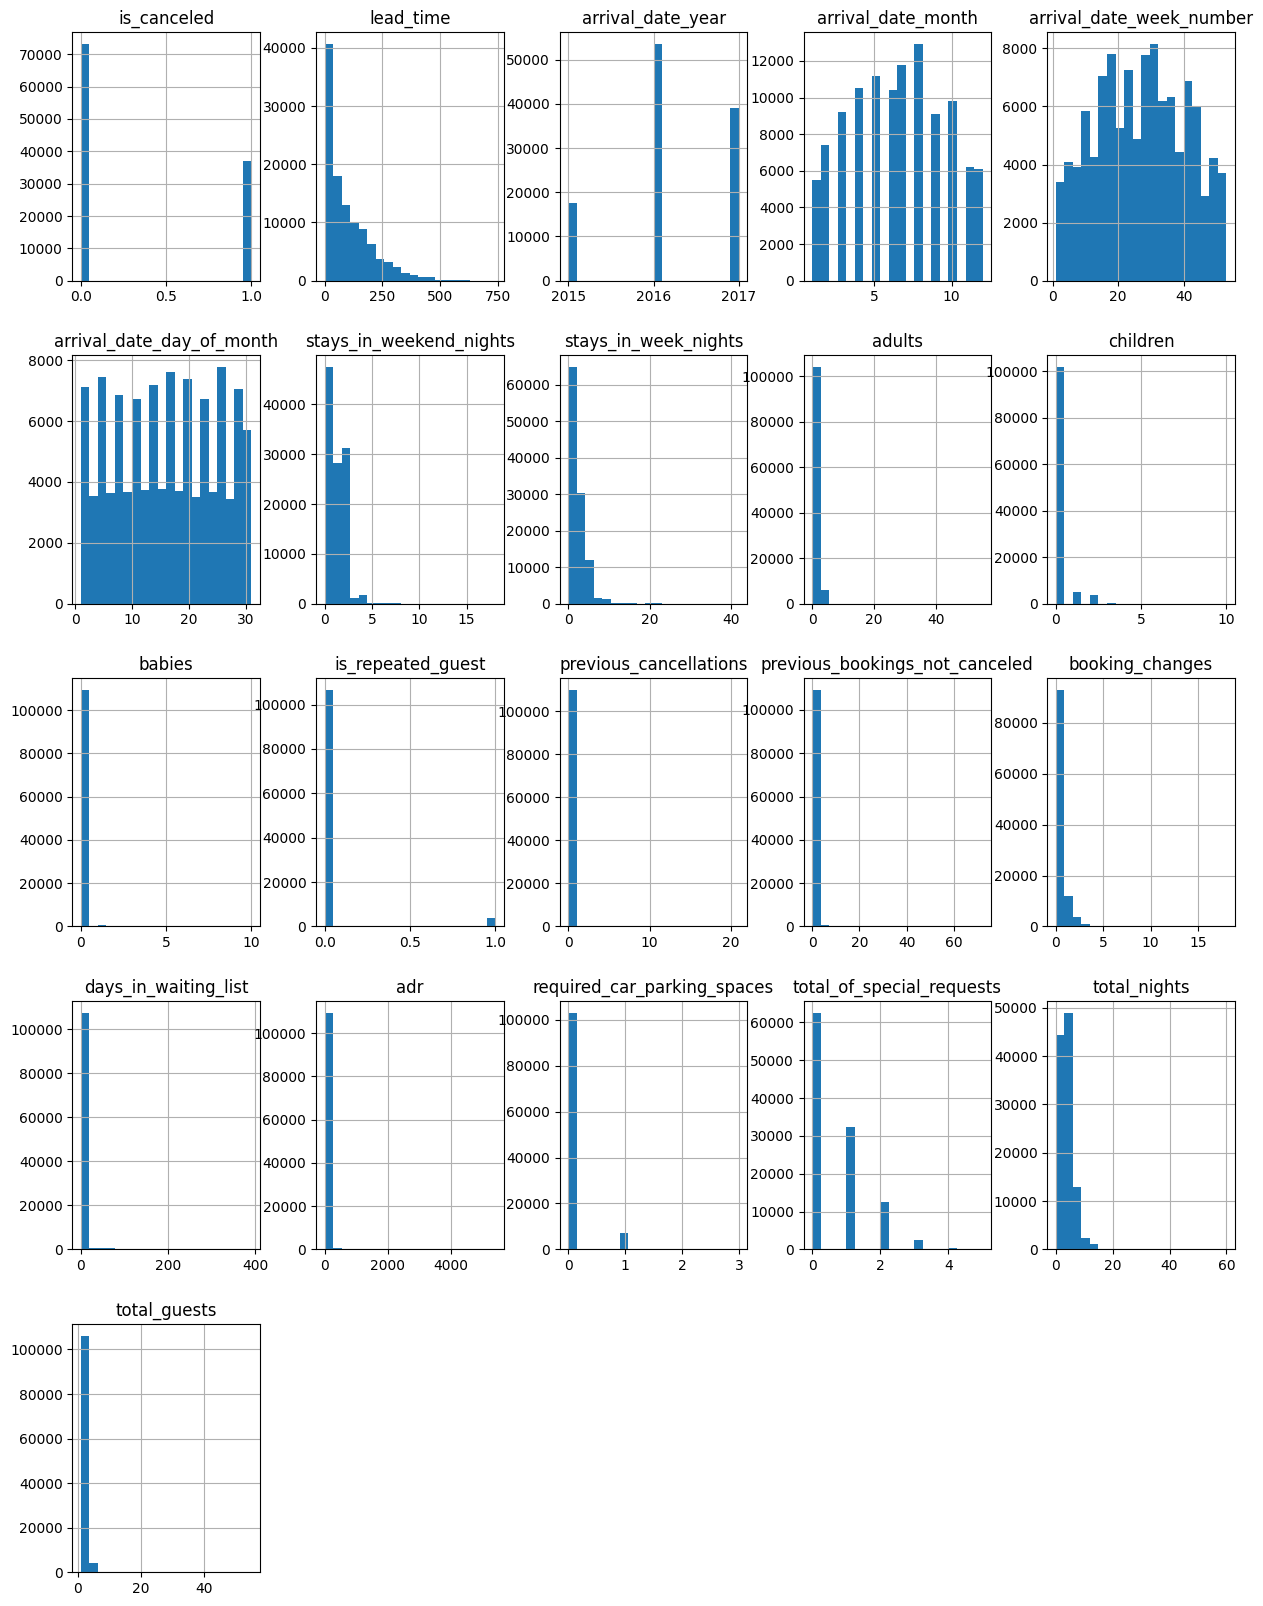

In [ ]:
df[num_cols].hist(bins=20, figsize=(15, 20))
plt.show()

In [ ]:
df[cat_cols].describe()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status
count,110195,110195,110195,110195,110195,110195,110195,110195,110195,110195,110195,110195
unique,2,5,178,7,5,9,10,3,334,346,4,3
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,0,Transient,Check-Out
freq,72654,84716,40894,55523,90209,77716,66437,100306,31572,103939,84177,73115


In [ ]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,55523
Offline TA/TO,22270
Groups,14730
Direct,12095
Corporate,4644
Complementary,698
Aviation,235


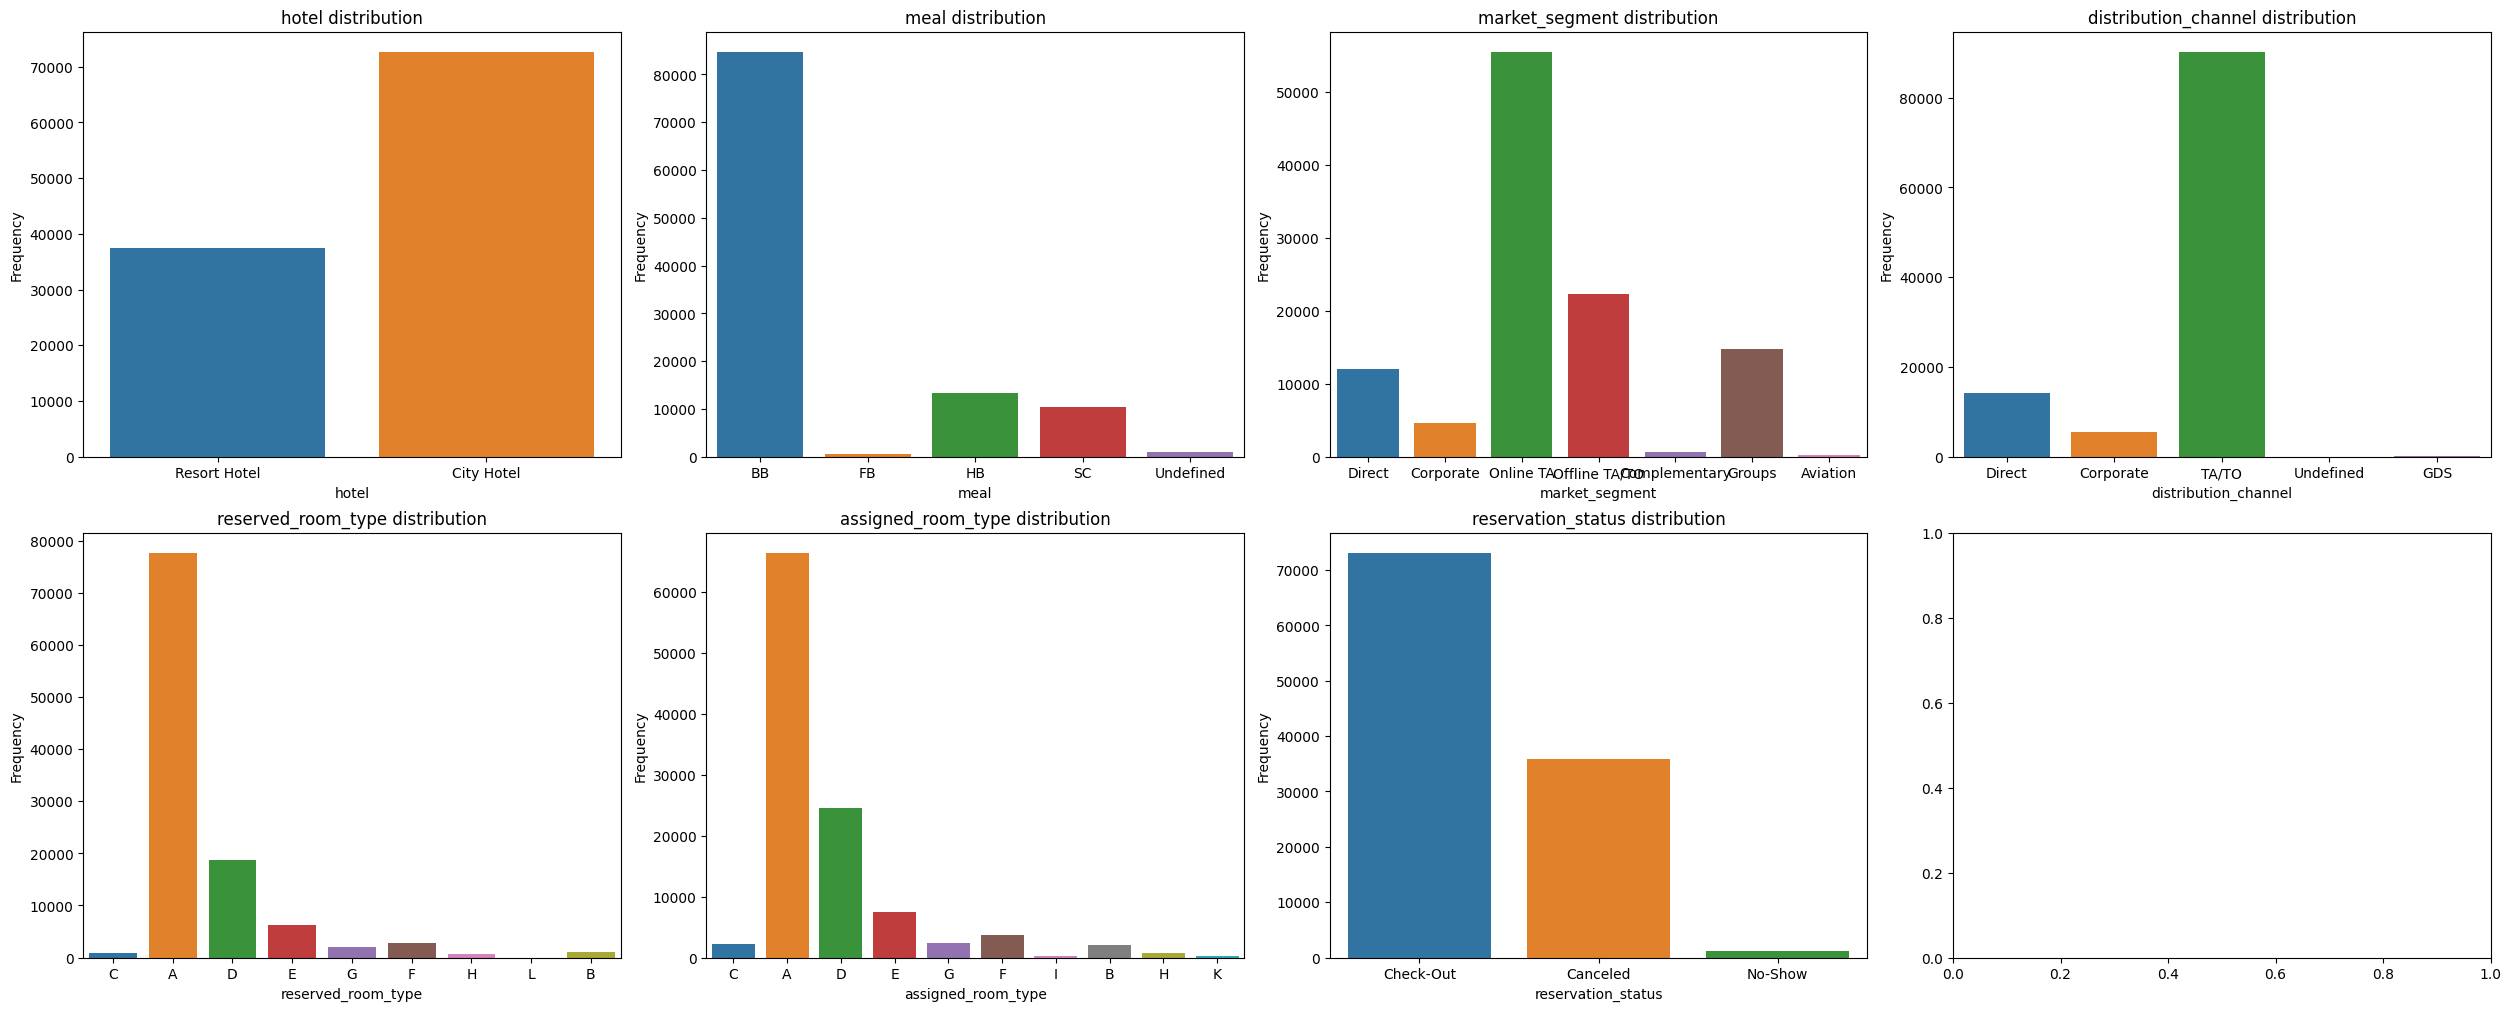

In [ ]:
plot_info = [
    {'col': 'hotel', 'title': 'hotel distribution', 'xlabel': 'hotel'},
    {'col': 'meal', 'title': 'meal distribution', 'xlabel': 'meal'},
    {'col': 'market_segment', 'title': 'market_segment distribution', 'xlabel': 'market_segment'},
    {'col': 'distribution_channel', 'title': 'distribution_channel distribution', 'xlabel': 'distribution_channel'},
    {'col': 'reserved_room_type', 'title': 'reserved_room_type distribution', 'xlabel': 'reserved_room_type'},
    {'col': 'assigned_room_type', 'title': 'assigned_room_type distribution', 'xlabel': 'assigned_room_type'},
    {'col': 'reservation_status', 'title': 'reservation_status distribution', 'xlabel': 'reservation_status'},
]

fig, axes = plt.subplots(2, 4, figsize=(25, 10), constrained_layout=True)

for ax, info in zip(axes.flatten(), plot_info):
    sns.countplot(x=info['col'], data=df, ax=ax, hue=info['col'])
    ax.set_title(info['title'])
    ax.set_xlabel(info['xlabel'])
    ax.set_ylabel('Frequency')

plt.show()

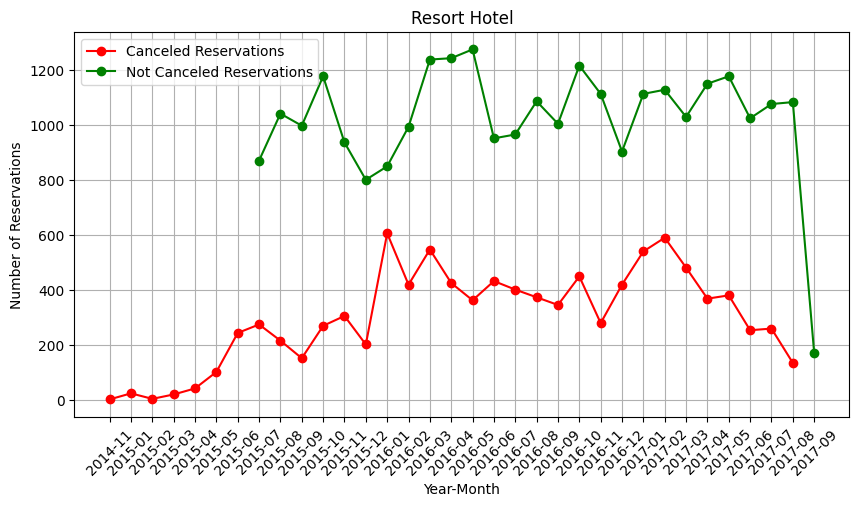

In [ ]:
# Visualization of the number of cancellations and successful reservations at Resort Hotel
resort_canceled = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 1)].copy()
resort_not_canceled = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)].copy()

resort_canceled['reservation_status_date'] = pd.to_datetime(resort_canceled['reservation_status_date'])
resort_not_canceled['reservation_status_date'] = pd.to_datetime(resort_not_canceled['reservation_status_date'])

resort_canceled['year_month'] = resort_canceled['reservation_status_date'].dt.to_period('M')
resort_not_canceled['year_month'] = resort_not_canceled['reservation_status_date'].dt.to_period('M')

monthly_cancellations = resort_canceled.groupby('year_month').size()
monthly_not_cancellations = resort_not_canceled.groupby('year_month').size()

monthly_cancellations.index = monthly_cancellations.index.astype(str)
monthly_not_cancellations.index = monthly_not_cancellations.index.astype(str)

# Draw graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_cancellations, label='Canceled Reservations', marker='o', color='red')
plt.plot(monthly_not_cancellations, label='Not Canceled Reservations', marker='o', color='green')
plt.title('Resort Hotel')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

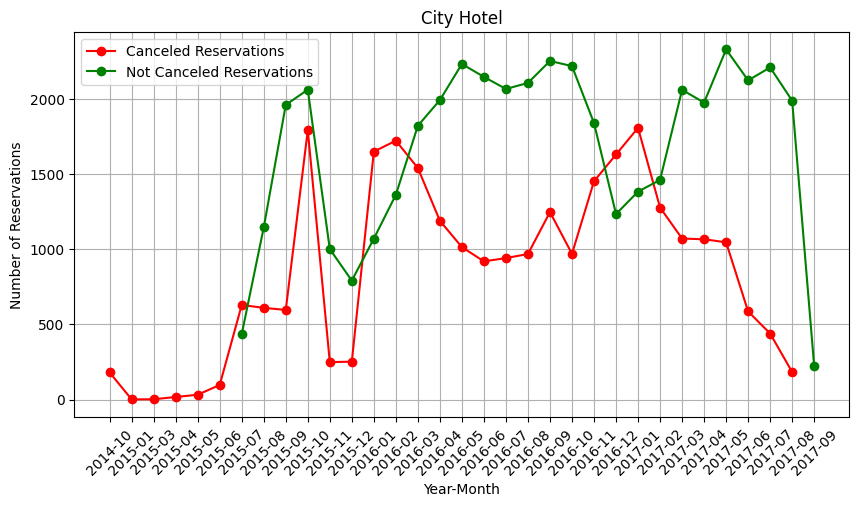

In [ ]:
# Visualization of the number of cancellations and successful reservations at City Hotel
city_canceled = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 1)].copy()
city_not_canceled = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)].copy()

city_canceled['reservation_status_date'] = pd.to_datetime(city_canceled['reservation_status_date'])
resort_not_canceled['reservation_status_date'] = pd.to_datetime(city_not_canceled['reservation_status_date'])

city_canceled['year_month'] = city_canceled['reservation_status_date'].dt.to_period('M')
city_not_canceled['year_month'] = city_not_canceled['reservation_status_date'].dt.to_period('M')

monthly_cancellations = city_canceled.groupby('year_month').size()
monthly_not_cancellations = city_not_canceled.groupby('year_month').size()

monthly_cancellations.index = monthly_cancellations.index.astype(str)
monthly_not_cancellations.index = monthly_not_cancellations.index.astype(str)

# Draw graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_cancellations, label='Canceled Reservations', marker='o', color='red')
plt.plot(monthly_not_cancellations, label='Not Canceled Reservations', marker='o', color='green')
plt.title('City Hotel')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
monthly_cancellations

,0
year_month,
2014-10,180
2015-01,1
2015-03,2
2015-04,17
2015-05,32
2015-06,97
2015-07,629
2015-08,610
2015-09,596


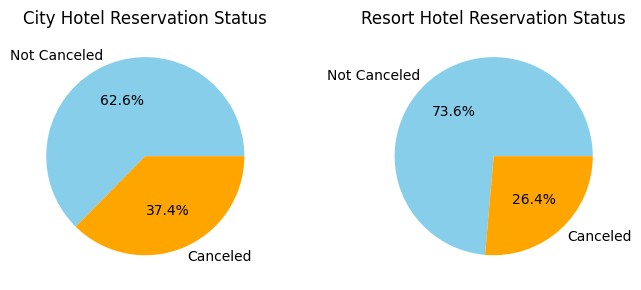

In [ ]:
hotel_status = df.groupby(['hotel', 'is_canceled']).size().reset_index(name='num_of_reservations')
hotel_status['status'] = hotel_status['is_canceled'].replace({0: 'Not Canceled', 1: 'Canceled'})

city_data = hotel_status[hotel_status['hotel'] == 'City Hotel']
resort_data = hotel_status[hotel_status['hotel'] == 'Resort Hotel']

# City Hotel Pie Chart
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.pie(city_data['num_of_reservations'], labels=city_data['status'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('City Hotel Reservation Status')

# Resort Hotel Pie Chart
plt.subplot(1, 2, 2)
plt.pie(resort_data['num_of_reservations'], labels=resort_data['status'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Resort Hotel Reservation Status')

plt.tight_layout()
plt.show()

In [ ]:
city_data

,hotel,is_canceled,num_of_reservations,status
0,City Hotel,0,45482,Not Canceled
1,City Hotel,1,27172,Canceled


In [ ]:
# Monthly Number of Customers at Resort Hotel
resort_not_canceled = df[(df['hotel'] == 'Resort Hotel')].copy()

resort_guests = resort_not_canceled[['arrival_date_year','arrival_date_month']].value_counts().reset_index()
resort_guests.columns=['year','month','num of guests']
resort_guests.sort_values(['year', 'month'])

,year,month,num of guests
18,2015,7,1299
16,2015,8,1343
21,2015,9,1241
14,2015,10,1363
24,2015,11,1028
23,2015,12,1168
25,2016,1,825
15,2016,2,1353
6,2016,3,1663
1,2016,4,1742


In [ ]:
city_not_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests,year_month
40060,City Hotel,0,6,2015,7,27,1,0,2,1,...,0,Transient,0.00,0,0,Check-Out,2015-07-03,2,1.0,2015-07
40066,City Hotel,0,3,2015,7,27,2,0,3,1,...,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05,3,1.0,2015-07
40070,City Hotel,0,43,2015,7,27,3,0,2,2,...,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,2,2.0,2015-07
40071,City Hotel,0,43,2015,7,27,3,0,2,2,...,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05,2,2.0,2015-07
40072,City Hotel,0,43,2015,7,27,3,0,2,2,...,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,2,2.0,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2.0,2017-09
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3.0,2017-09
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2.0,2017-09
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2.0,2017-09


In [ ]:
# Monthly Number of Customers at City Hotel
city_not_canceled = df[(df['hotel'] == 'City Hotel')].copy()

city_guests = city_not_canceled[['arrival_date_year','arrival_date_month']].value_counts().reset_index()
city_guests.columns=['year','month','num of guests']
city_guests

,year,month,num of guests
0,2017,5,4299
1,2016,10,4128
2,2017,4,3805
3,2016,6,3772
4,2016,9,3763
5,2017,6,3741
6,2016,5,3530
7,2017,7,3434
8,2016,4,3344
9,2016,8,3292


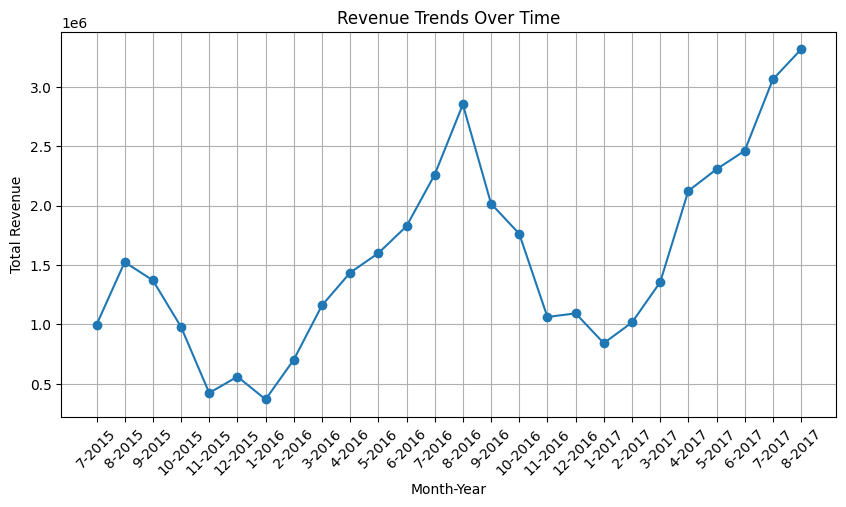

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure ADR has no negative values
df = df[df['adr'] >= 0]  # Remove negative ADR values

# Convert month names to numbers if needed
if df['arrival_date_month'].dtype == 'O':  # 'O' means object (string)
    df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: pd.to_datetime(x, format='%B').month)

# Calculate revenue per booking
df['revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])

# Group by year and month to track revenue trends
revenue_trend = df.groupby(['arrival_date_year', 'arrival_date_month'])['revenue'].sum().reset_index()

# Sort values chronologically
revenue_trend = revenue_trend.sort_values(by=['arrival_date_year', 'arrival_date_month'])

# Plot revenue trends
plt.figure(figsize=(10, 5))
plt.plot(revenue_trend['arrival_date_month'].astype(str) + '-' + revenue_trend['arrival_date_year'].astype(str),
         revenue_trend['revenue'], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.title("Revenue Trends Over Time")
plt.grid()
plt.show()

In [ ]:
revenue_trend

,arrival_date_year,arrival_date_month,revenue
0,2015,7,995564.59
1,2015,8,1523735.25
2,2015,9,1370209.81
3,2015,10,977653.74
4,2015,11,421735.19
5,2015,12,559279.74
6,2016,1,367629.43
7,2016,2,701783.72
8,2016,3,1159021.46
9,2016,4,1434919.43


In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests,revenue
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0,0.00
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0,0.00
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0,75.00
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0,75.00
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2.0,196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2.0,672.98
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3.0,1578.01
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2.0,1103.97
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2.0,730.80


In [ ]:
import sqlite3
import pandas as pd


# Step 1: Connect to SQLite Database (Creates 'data.db' if it doesn’t exist)
conn = sqlite3.connect("booking_data.db")
cursor = conn.cursor()

# Step 2: Write DataFrame to SQLite Table
df.to_sql("booking", conn, if_exists="replace", index=False)

DatabaseError: Execution failed on sql 'SELECT * FROM users': no such table: users

In [ ]:

# Step 3: Verify by Reading Back
df_from_db = pd.read_sql("SELECT * FROM booking", conn)

# Close Connection
conn.close()

# Print Retrieved Data
print(df_from_db)


               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
110189    City Hotel            0         23               2017   
110190    City Hotel            0        102               2017   
110191    City Hotel            0         34               2017   
110192    City Hotel            0        109               2017   
110193    City Hotel            0        205               2017   

        arrival_date_month  arrival_date_week_number  \
0                        7                        27   
1                        7                        27   
2                        7 

In [ ]:
df_from_db.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests,revenue
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01 00:00:00,0,2.0,0.0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01 00:00:00,0,2.0,0.0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02 00:00:00,1,1.0,75.0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02 00:00:00,1,1.0,75.0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03 00:00:00,2,2.0,196.0


# VectorStore

In [ ]:
%pip install langchain langchain-chroma chroma

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%pip install langchain-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from langchain_core.documents import Document

document = Document(
    page_content="Hello, world!",
    metadata={"source": "https://example.com"}
)

In [ ]:
document

Document(metadata={'data':     arrival_date_year  arrival_date_month     revenue
0                2015                   7   995564.59
1                2015                   8  1523735.25
2                2015                   9  1370209.81
3                2015                  10   977653.74
4                2015                  11   421735.19
5                2015                  12   559279.74
6                2016                   1   367629.43
7                2016                   2   701783.72
8                2016                   3  1159021.46
9                2016                   4  1434919.43
10               2016                   5  1599207.07
11               2016                   6  1825861.20
12               2016                   7  2260167.73
13               2016                   8  2851714.64
14               2016                   9  2015906.91
15               2016                  10  1762501.57
16               2016                  11  1061540.75
1

In [ ]:
all_docs = []

In [ ]:
cat_info = [
    {'col': 'hotel', 'title': 'hotel distribution', 'description': 'type of hotels'},
    {'col': 'meal', 'title': 'meal distribution', 'description': 'type of meal'},
    {'col': 'market_segment', 'title': 'market_segment distribution', 'description': 'market_segment'},
    {'col': 'distribution_channel', 'title': 'distribution_channel distribution', 'description': 'distribution channel'},
    {'col': 'reserved_room_type', 'title': 'reserved_room_type distribution', 'description': 'reserved room type'},
    {'col': 'assigned_room_type', 'title': 'assigned_room_type distribution', 'description': 'assigned room type'},
    {'col': 'reservation_status', 'title': 'reservation_status distribution', 'description': 'reservation status'},
]

In [ ]:
for cat in cat_info:
  data = {'data':str(df[cat['col']].value_counts())}
  document = Document(
    page_content=cat["description"],
    metadata={**data,**cat}
  )
  all_docs.append(document)


In [ ]:
all_docs[-1]

Document(metadata={'data': 'reservation_status\nCheck-Out    73114\nCanceled     35889\nNo-Show       1191\nName: count, dtype: int64', 'col': 'reservation_status', 'title': 'reservation_status distribution', 'description': 'reservation status'}, page_content='reservation status')

In [ ]:
data_dict = {
    "monthly_cancellations": {
        "data": str(monthly_cancellations),
        "description": "Number of cancellations per month, grouped by 'year_month'."
    },
    "monthly_not_cancellations": {
        "data": str(monthly_not_cancellations),
        "description": "Number of non-canceled bookings per month, grouped by 'year_month'."
    },
    "city_data": {
        "data": str(city_data),
        "description": "Subset of 'hotel_status' DataFrame where the hotel type is 'City Hotel'."
    },
    "resort_data": {
        "data": str(resort_data),
        "description": "Subset of 'hotel_status' DataFrame where the hotel type is 'Resort Hotel'."
    },
    "resort_guests_sorted": {
        "data": str(resort_guests.sort_values(['year', 'month'])),
        "description": "Resort guest data sorted by 'year' and 'month'."
    },
    "city_guests": {
        "data": str(city_guests),
        "description": "City hotel guest data (original dataset without modifications)."
    },
    "revenue_trend": {
        "data": str(revenue_trend),
        "description": "revenue earned per month"
    }
}

# Loop through dictionary and access variables
for key, value in data_dict.items():
    print(f"{key}: {value['description']}")
    print(value["data"])  # This prints the actual DataFrame or Series
    print("-" * 50)


monthly_cancellations: Number of cancellations per month, grouped by 'year_month'.
year_month
2014-10     180
2015-01       1
2015-03       2
2015-04      17
2015-05      32
2015-06      97
2015-07     629
2015-08     610
2015-09     596
2015-10    1792
2015-11     249
2015-12     252
2016-01    1649
2016-02    1722
2016-03    1540
2016-04    1189
2016-05    1014
2016-06     919
2016-07     941
2016-08     968
2016-09    1247
2016-10     969
2016-11    1452
2016-12    1630
2017-01    1807
2017-02    1277
2017-03    1071
2017-04    1066
2017-05    1046
2017-06     586
2017-07     439
2017-08     183
dtype: int64
--------------------------------------------------
monthly_not_cancellations: Number of non-canceled bookings per month, grouped by 'year_month'.
year_month
2015-07     435
2015-08    1145
2015-09    1960
2015-10    2061
2015-11    1001
2015-12     791
2016-01    1070
2016-02    1362
2016-03    1821
2016-04    1992
2016-05    2232
2016-06    2146
2016-07    2066
2016-08    2106


In [ ]:
for key, value in data_dict.items():
  document = Document(
    page_content=value["description"],
    metadata=value
  )
  all_docs.append(document)

In [ ]:
len(all_docs)

14

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings.embed_query(all_docs[0].page_content)

[0.02664669044315815,
 -0.05396341159939766,
 -0.010896329768002033,
 0.04736741632223129,
 -0.020799241960048676,
 -0.014585751108825207,
 0.03135572001338005,
 0.050524547696113586,
 -0.022185910493135452,
 -0.028654444962739944,
 -0.05406714603304863,
 -0.05881759524345398,
 0.055038489401340485,
 -0.005586201790720224,
 0.03535305708646774,
 0.03240664303302765,
 0.04285377264022827,
 -0.01629513129591942,
 -0.04247768968343735,
 -0.006585108116269112,
 -0.08455859124660492,
 0.00852203369140625,
 -0.010693944990634918,
 0.012928060255944729,
 0.07177532464265823,
 -0.043771423399448395,
 -0.04434296116232872,
 -0.011403634212911129,
 0.010512121953070164,
 0.026915252208709717,
 0.015515126287937164,
 0.014123092405498028,
 0.041563212871551514,
 -0.0025296492967754602,
 1.4481428252111073e-06,
 0.026684025302529335,
 -0.016444584354758263,
 -0.020430300384759903,
 0.04472978040575981,
 -0.07621482014656067,
 -0.05148753896355629,
 0.03327695280313492,
 0.028009414672851562,
 0.00

In [ ]:
from langchain_chroma import Chroma

vector_store = Chroma.from_documents(
    documents=all_docs,
    embedding=embeddings,
    persist_directory="./chroma_langchain",  # Where to save data locally, remove if not necessary
)

In [ ]:
vector_store.similarity_search("revenue")

[Document(id='58f4e34e-5ba7-4df0-9f67-716866be8216', metadata={'data': '    arrival_date_year  arrival_date_month     revenue\n0                2015                   7   995564.59\n1                2015                   8  1523735.25\n2                2015                   9  1370209.81\n3                2015                  10   977653.74\n4                2015                  11   421735.19\n5                2015                  12   559279.74\n6                2016                   1   367629.43\n7                2016                   2   701783.72\n8                2016                   3  1159021.46\n9                2016                   4  1434919.43\n10               2016                   5  1599207.07\n11               2016                   6  1825861.20\n12               2016                   7  2260167.73\n13               2016                   8  2851714.64\n14               2016                   9  2015906.91\n15               2016                  10  17625

In [ ]:
!zip -r "/content/db.zip" "/content/chroma_langchain"


  adding: content/chroma_langchain/ (stored 0%)
  adding: content/chroma_langchain/chroma.sqlite3 (deflated 77%)
  adding: content/chroma_langchain/600e9efe-ea80-4453-9338-3e64296e5740/ (stored 0%)
  adding: content/chroma_langchain/600e9efe-ea80-4453-9338-3e64296e5740/length.bin (deflated 17%)
  adding: content/chroma_langchain/600e9efe-ea80-4453-9338-3e64296e5740/header.bin (deflated 61%)
  adding: content/chroma_langchain/600e9efe-ea80-4453-9338-3e64296e5740/data_level0.bin (deflated 14%)
  adding: content/chroma_langchain/600e9efe-ea80-4453-9338-3e64296e5740/link_lists.bin (stored 0%)


In [ ]:
from google.colab import files
files.download("/content/booking_data.db")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import sqlite3
import pandas as pd

def get_booking_details(query):
    """
    Executes an SQL query on the 'booking_data.db' SQLite database and returns the result as a Pandas DataFrame.
    Use this function to respond to any question about the booking data.

    Parameters:
    query (str): The SQL query to execute.

    Returns:
    pd.DataFrame: A DataFrame containing the query results.
    """
    # Step 1: Connect to SQLite Database (Creates 'booking_data.db' if it doesn’t exist)
    conn = sqlite3.connect("booking_data.db")
    cursor = conn.cursor()

    # Step 2: Execute the query and fetch results into a Pandas DataFrame
    data = pd.read_sql(query, conn)

    # Step 3: Close the database connection
    conn.close()

    # Step 4: Return the query result as a DataFrame
    return data

# Example usage: Fetch first 5 records from the 'booking' table
print(get_booking_details("SELECT * FROM booking LIMIT 5"))


          hotel  is_canceled  lead_time  arrival_date_year  \
0  Resort Hotel            0        342               2015   
1  Resort Hotel            0        737               2015   
2  Resort Hotel            0          7               2015   
3  Resort Hotel            0         13               2015   
4  Resort Hotel            0         14               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   7                        27                          1   
1                   7                        27                          1   
2                   7                        27                          1   
3                   7                        27                          1   
4                   7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0  

In [4]:
df = get_booking_details("SELECT * FROM booking LIMIT 5")

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights',
       'total_guests', 'revenue'],
      dtype='object')

In [ ]:
from langchain_chroma import Chroma

vector_store = Chroma(
    embedding_function==embeddings,
    persist_directory="./chroma_langchain",  # Where to save data locally, remove if not necessary
)
def get_analytics(query):
    """
    Performs a similarity search using the vector store and returns the top-k most relevant results.

    Parameters:
    query (str): The search query for retrieving relevant results.

    Returns:
    list: A list of the top-k most similar results from the vector store.
    """
    # Step 1: Perform a similarity search in the vector store
    data = vector_store.similarity_search(query, k=3)

    # Step 2: Return the top 3 most relevant results
    return data
